In [1]:
from src.model import init_model

model = init_model("data/model.pt")

In [2]:
from src.utils import load_nifti

survey = load_nifti("data/volume-0.nii")  # should be [W, H, D]
survey.shape

(512, 512, 75)

In [3]:
from src.utils import preprocess_nifti, normalize

preprocessed = preprocess_nifti(survey)
normalized = normalize(preprocessed)

In [4]:
import torch

with torch.no_grad():
    output = model(normalized)[0]
output.shape

torch.Size([105, 256, 256, 256])

In [5]:
from src.utils import postprocess_output

array = postprocess_output(output)
array.shape

(256, 256, 256)

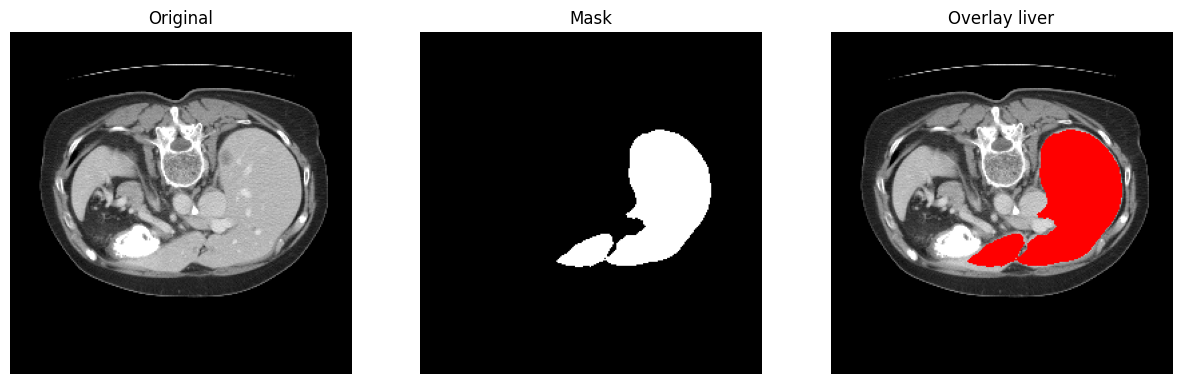

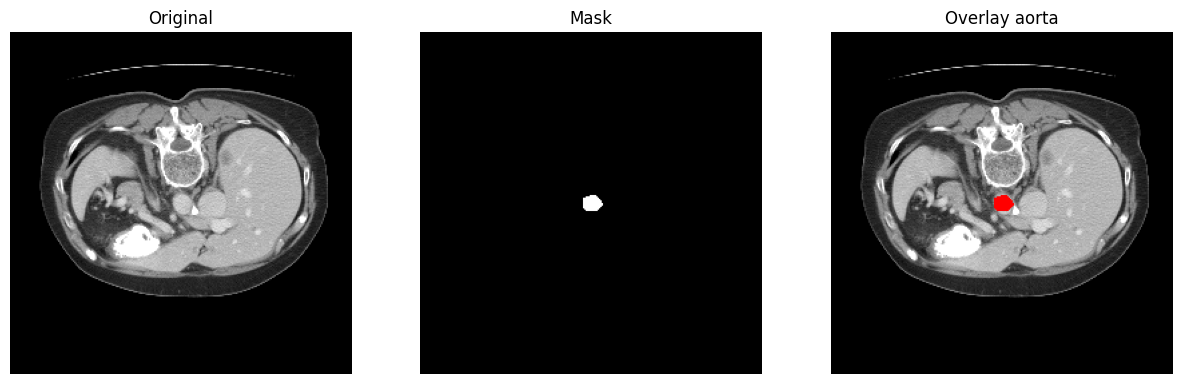

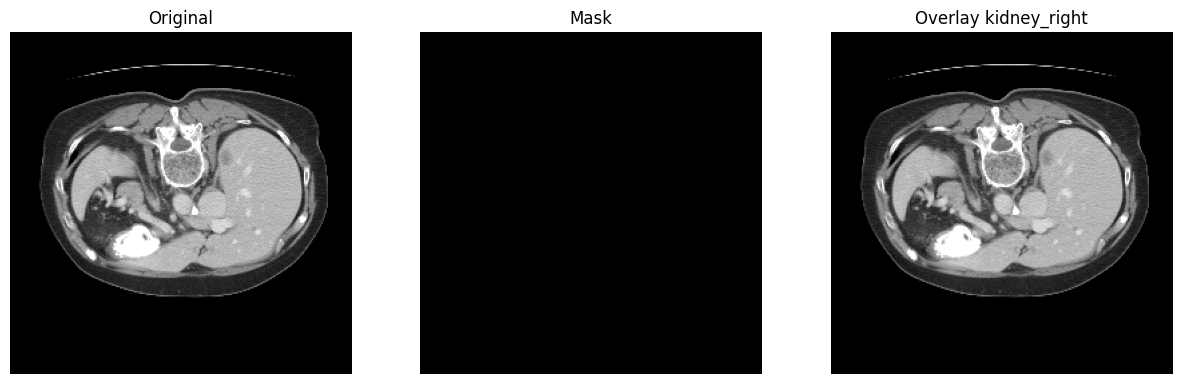

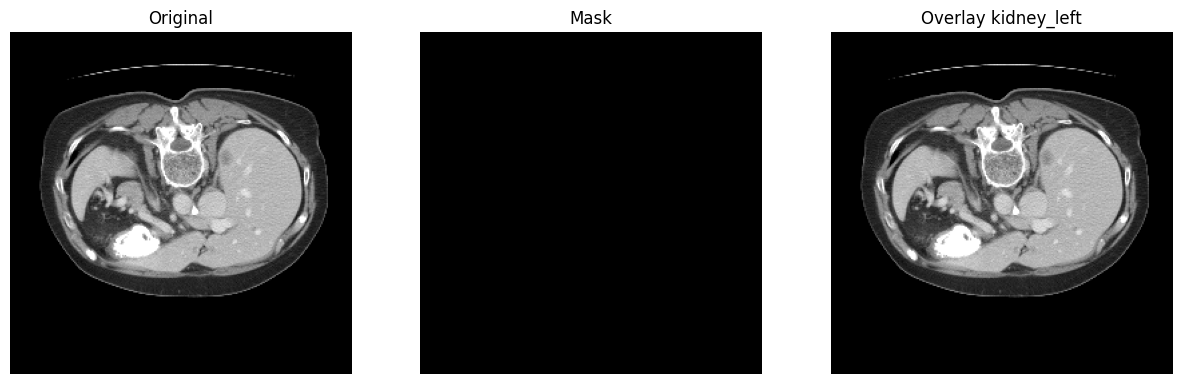

In [6]:
import matplotlib.pyplot as plt
from src.utils import windowing, get_mask_by_class
import numpy as np

classes = [
    "liver",
    "aorta",
    "kidney_right",
    "kidney_left",
]

slice_id = 200  # change this to see more

slice_array = np.swapaxes(array, 0, 2)[slice_id]
random_slice = np.swapaxes(preprocessed[0][0], 0, 2)[slice_id]
random_slice = windowing(random_slice, 40, 400)
colors = plt.cm.tab10(np.linspace(0, 1, len(classes)))

for i in range(len(classes)):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    mask = get_mask_by_class(slice_array, name=classes[i])
    axs[0].imshow(random_slice, cmap='gray')
    axs[0].set_title("Original")
    axs[0].axis('off')
    axs[1].imshow(mask, cmap='gray')
    axs[1].set_title("Mask")
    axs[1].axis('off')
    overlayed_mask = random_slice * (1 - mask)
    overlayed_mask = normalize(overlayed_mask)
    rgb_mask = np.dstack((overlayed_mask, overlayed_mask, overlayed_mask))
    rgb_mask[mask == 1] = (1, 0, 0)
    axs[2].imshow(rgb_mask)
    axs[2].set_title(f"Overlay {classes[i]}")
    axs[2].axis('off')
    plt.show()